In [1]:
import pandas as pd

location = "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias"

diapause = pd.read_csv(f"{location}/2.ERC_plot/ERC_correlation_non_diapause_longform.csv")


In [4]:
gene_anno_dic = {}
# location = "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/12.Rho_networks/2.Diapausing"
with open(f"/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/12.Rho_networks/2.Diapausing/Gene_cluster_degree.csv", 'r') as cor_file:
    for lines in cor_file.readlines()[1:]:
        gene_name = lines.split(",")[0]
        # print(gene_name)
        anno_name = lines.split(",")[1]
        gene_anno_dic[gene_name]= anno_name
print(gene_anno_dic)

{'5969at7088': 'DCAF7', '1943at7088': 'PKP4', '775at7088': 'SMARCA4', '1625at7088': 'SUPT5H', '7044at7088': 'GDAP2', '3839at7088': 'SMU1', '7446at7088': 'SGPP1', '2719at7088': 'BTBD9', '2003at7088': 'Chlor_1', '1993at7088': 'SMC2', '13002at7088': 'RBM48', '983at7088': 'LLGL1', 'cry1a': 'cry1a', '5891at7088': 'ACTL6A', '1076at7088': 'KDM2A', '9518at7088': 'COPE', 'cycle': 'cycle', '5314at7088': 'GPROAR1', '1746at7088': 'IQSEC1', '10826at7088': 'ARFIP1', '5036at7088': 'CHAF1B', '263at7088': 'PBRM1', '1319at7088': 'COPB2', '11115at7088': 'Missing', '2984at7088': 'PPAT', '10186at7088': 'SURF4', '190at7088': 'NWD2', '1065at7088': 'MAST4', '10778at7088': 'GATAD2A', '1753at7088': 'XPO5', '338at7088': 'TAF1', '1130at7088': 'EEF2', '2081at7088': 'EIF3A', '11337at7088': 'ATP5F1', '1330at7088': 'SEC23A', '2166at7088': 'PLS3', '1530at7088': 'PWP2', '10916at7088': 'RPL7A', '68at7088': 'FRY', '795at7088': 'EFTUD2', '7656at7088': 'NDC80', '7855at7088': 'PDHB', '4064at7088': 'SGPL1', '1218at7088': 'NN

['5314at7088', '190at7088', '1130at7088', '11337at7088', '1530at7088', '1218at7088', '4163at7088', '4305at7088', '3069at7088', '5099at7088', '9472at7088', '1760at7088', '380at7088', '5898at7088', '1947at7088', '1846at7088', '4621at7088', '5038at7088', '11765at7088', '4998at7088', '11835at7088', '4287at7088', '6279at7088', '1131at7088', '496at7088', '3833at7088', '4286at7088', '6950at7088', '13004at7088', '4996at7088', '4858at7088', '3053at7088', '4142at7088', '4549at7088', '1003at7088', '9985at7088', '2097at7088', '8559at7088', '3259at7088', '4685at7088', '6607at7088', '417at7088', '2339at7088', '6273at7088', '8065at7088', '13414at7088', '10963at7088', '7475at7088', '10387at7088', '13447at7088', '3865at7088', '10086at7088', '10896at7088', '3911at7088', '12254at7088', '6908at7088', '4089at7088', '8982at7088', '12834at7088', '389at7088', '4110at7088']


AttributeError: 'ClusterGrid' object has no attribute 'set_xticklabels'

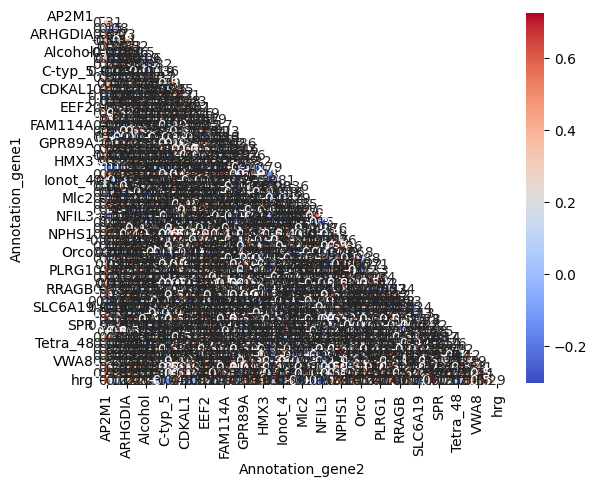

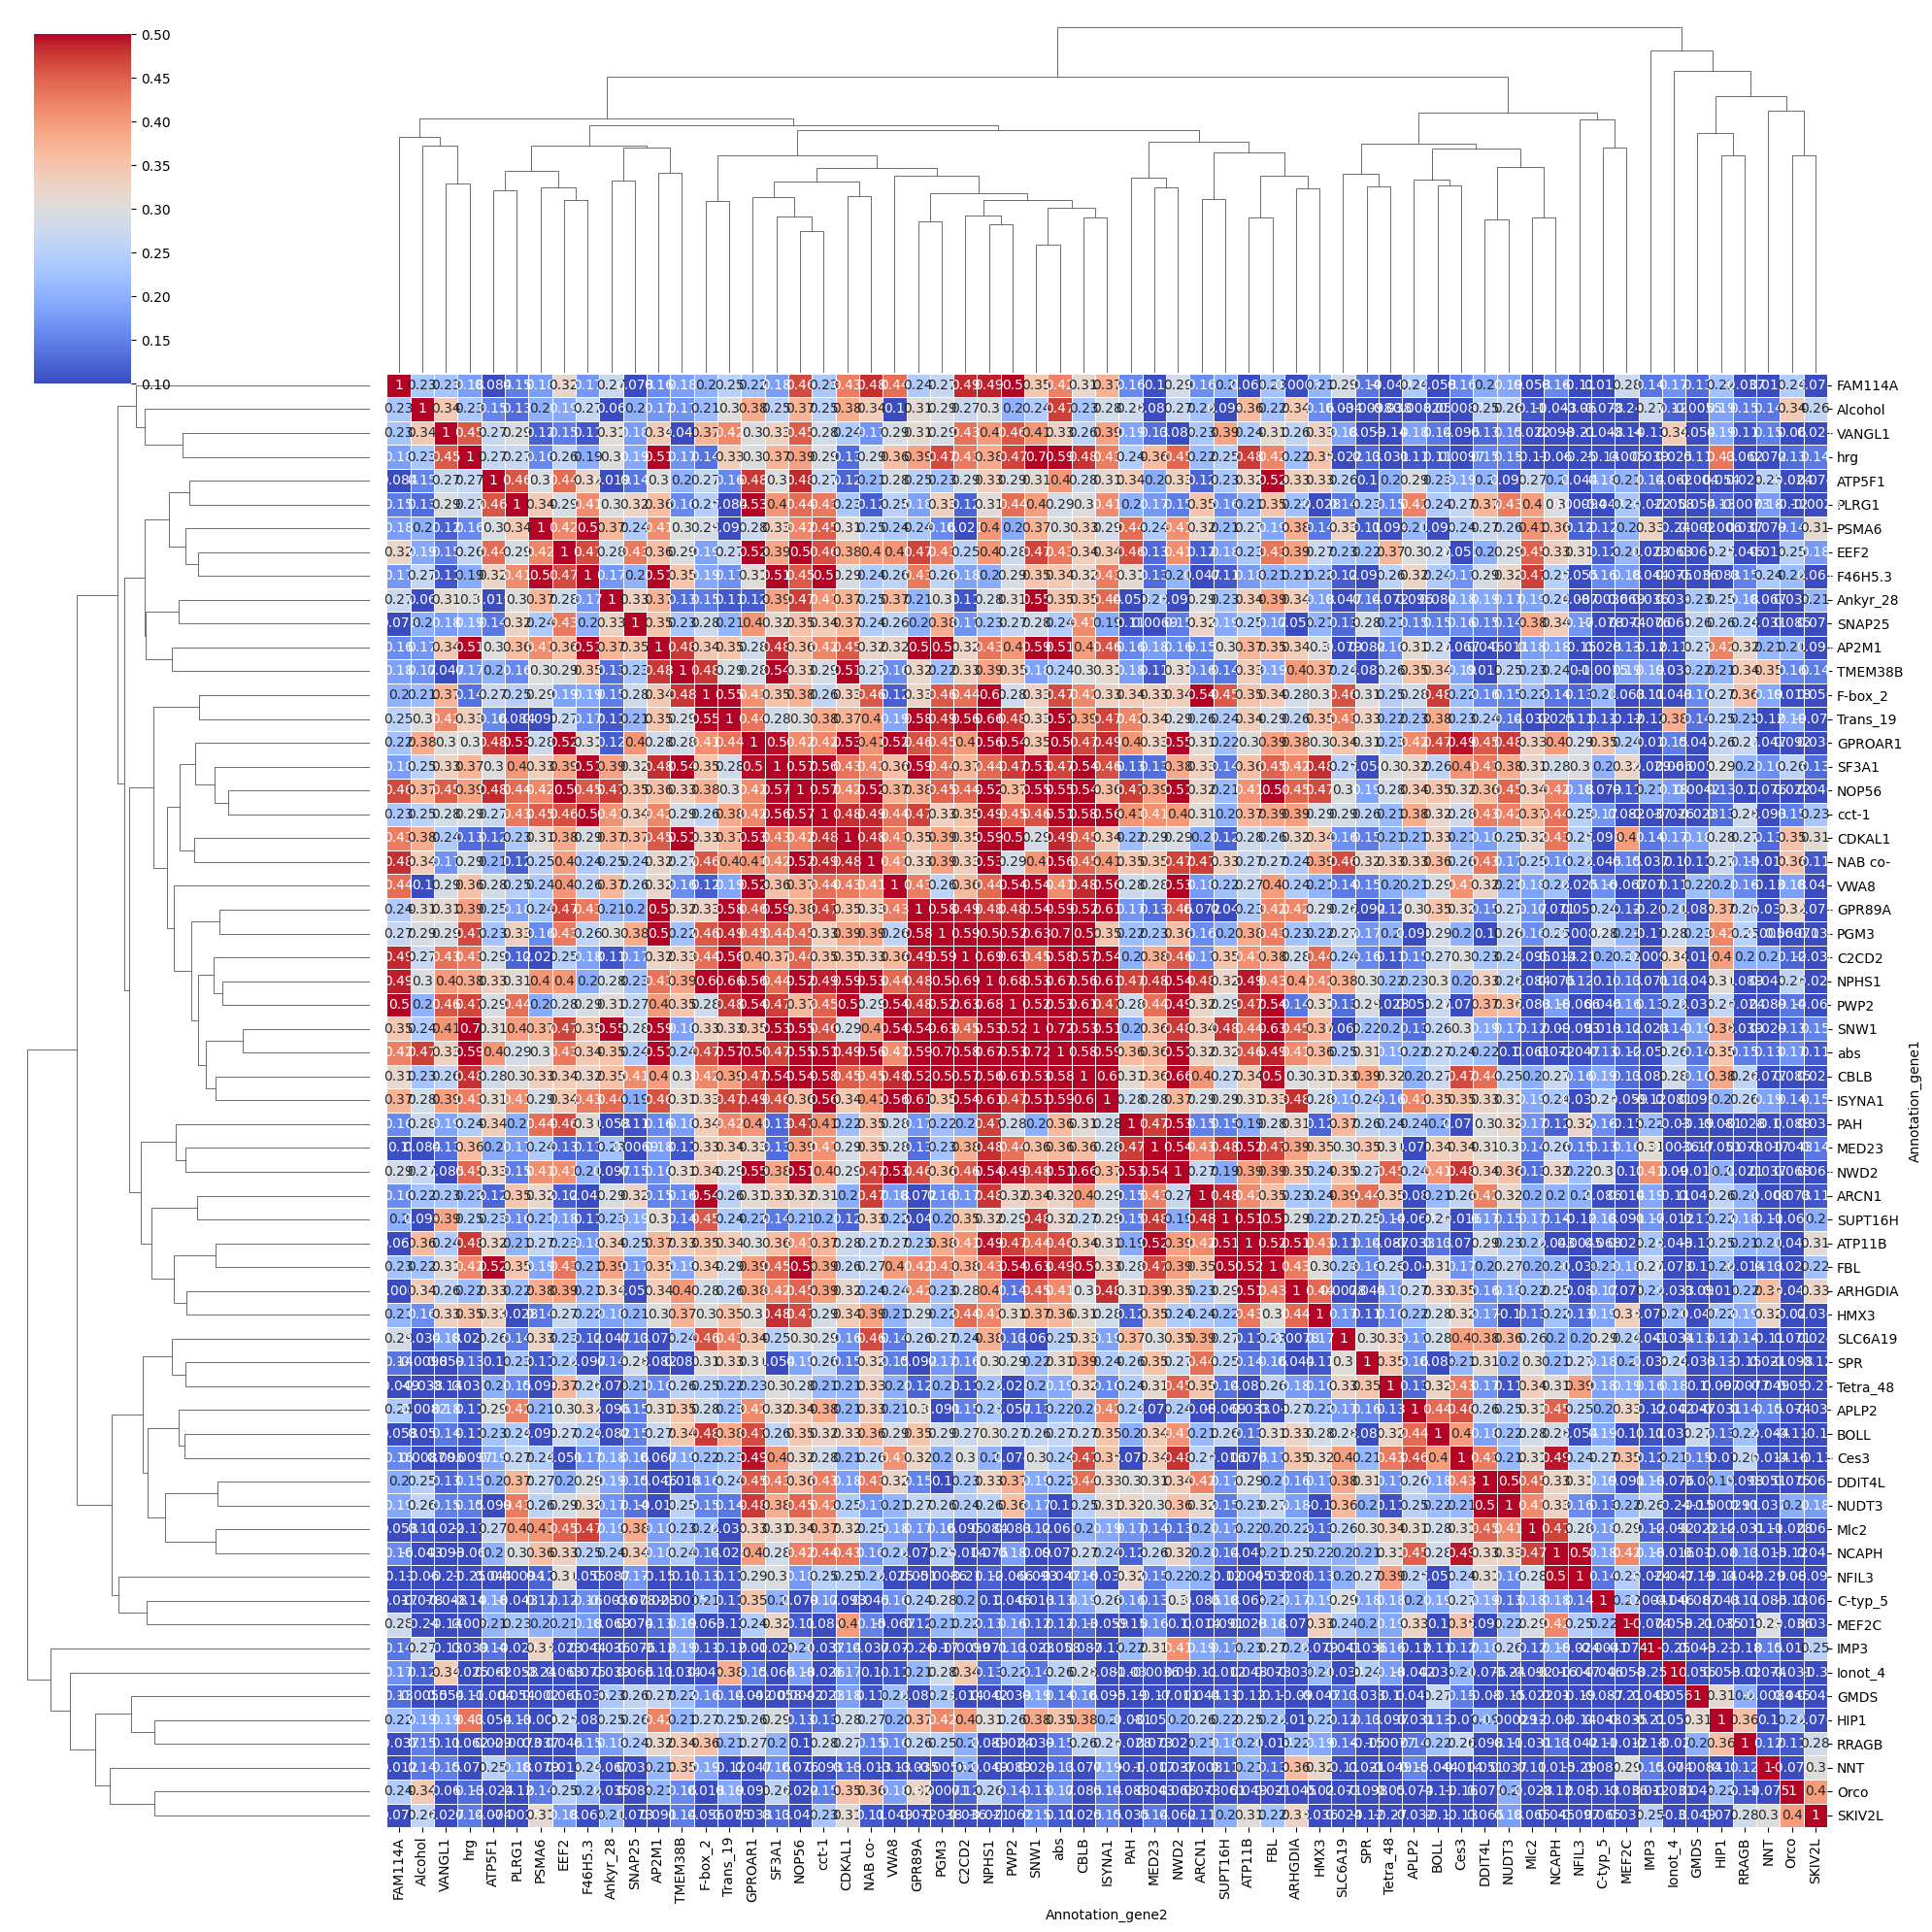

In [8]:
location = "/mnt/c/Users/sauba/Desktop/20.RERConverge_trimmed/3.New_colias/61.New_alignment_colias/17.GSEA_Rho-set_clusters"

import os

list_of_folders = os.listdir(f"{location}")
for folder_name in list_of_folders:
    if "Cluster" in folder_name:
        gene_list = []
        with open(f"{location}/{folder_name}/gene_names.txt", 'r') as gene_file:
            for lines in gene_file.readlines()[1:]:
                gene_list.append(lines.strip())
        print(gene_list)
        filtered_df = diapause[diapause['Gene1'].isin(gene_list)& diapause['Gene2'].isin(gene_list)]
        filtered_df = filtered_df.rename(columns={"value": "Correlation"})

        def check_annotation(name):
            return gene_anno_dic.get(name, name)
        
        filtered_df["Annotation_gene1"] = filtered_df["Gene1"].apply(check_annotation)
        filtered_df["Annotation_gene2"] = filtered_df["Gene2"].apply(check_annotation)
        
        
        # filtered_df = filtered_df.drop('Unnamed: 0', axis=1)
        filtered_df["Correlation"].fillna(1, inplace=True)
        filtered_df_can_list_pivot = filtered_df.pivot(index="Annotation_gene1", columns="Annotation_gene2", values="Correlation")

        filtered_df_can_list_pivot = filtered_df_can_list_pivot.fillna(1)
        import seaborn as sns
        import matplotlib.pyplot as plt
        import pandas as pd
        import numpy as np
        
        
        # mask =np.triu(np.ones_like(filtered_df_can_list_pivot, dtype=bool))
        
        # Create clustered heatmap with masking
        # 
        # sns.clustermap(filtered_df_can_list_pivot, cmap="coolwarm", annot=True,mask=mask, linewidths=0.5, figsize=(8, 6))
        
        
        mask = np.triu(np.ones_like(filtered_df_can_list_pivot, dtype=bool))
        # plt.figure(figsize=(8, 8))
        
        ax = sns.heatmap(filtered_df_can_list_pivot, mask=mask, annot=True, cmap='coolwarm', cbar=True)
        
        ax = sns.clustermap(filtered_df_can_list_pivot, cmap="coolwarm", vmin=0.1, vmax=0.5, annot=True, linewidths=0.5, figsize=(20, 20))
        
        # ax.savefig("/mnt/g/My Drive/Circadian Rhythm Genes Project/61.New_alignment_colias/2ERC_plot from  old/clustermap_output.pdf", format="pdf", bbox_inches='tight')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')  # Vertical x-axis labels
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right') 
        
        ax.set_xlabel("Gene 1", fontsize=12)
        ax.set_ylabel("Gene 2", fontsize=12)
        print(filtered_df)
        assert False
        candidate_gene_name = "gene_names.txt"

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# mask =np.triu(np.ones_like(filtered_df_can_list_pivot, dtype=bool))

# Create clustered heatmap with masking
# 
# sns.clustermap(filtered_df_can_list_pivot, cmap="coolwarm", annot=True,mask=mask, linewidths=0.5, figsize=(8, 6))


mask = np.triu(np.ones_like(filtered_df_can_list_pivot, dtype=bool))
# plt.figure(figsize=(8, 8))

ax = sns.heatmap(filtered_df_can_list_pivot, mask=mask, annot=True, cmap='coolwarm', cbar=True)

ax = sns.clustermap(filtered_df_can_list_pivot, cmap="coolwarm", vmin=0.1, vmax=0.5, annot=True, linewidths=0.5, figsize=(20, 20))

# ax.savefig("/mnt/g/My Drive/Circadian Rhythm Genes Project/61.New_alignment_colias/2ERC_plot from  old/clustermap_output.pdf", format="pdf", bbox_inches='tight')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')  # Vertical x-axis labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha='right') 

ax.set_xlabel("Gene 1", fontsize=12)
ax.set_ylabel("Gene 2", fontsize=12)